## PROBLEM ON : ADVANCE REGRESSION
### HOUSE PRICE PREDICTION
Build model the price of houses with the available independent variables

#### PRELIMINARY : EDA

#### IGNORE WARNING AND IMPORT LIBRRARIES

In [915]:
#import required libraries
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import seaborn as sns

##### READING THE DATA CSV

In [916]:
# reading the dataset
data = pd.read_csv("train.csv", encoding = 'utf-8')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###### SANITY FUNCTIONS AND INVESTIGATION ON DATA

In [917]:
def number_rows_columns(data):
    rows, columns = data.shape

    print(f'The dataset has {rows} rows and {columns} columns')
    print("\n")
    

In [918]:
number_rows_columns(data)

The dataset has 1460 rows and 81 columns




In [919]:
def check_duplicates(data):
    row, column = data[data.duplicated()].shape
    print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')
    

In [920]:
check_duplicates(data)

There are no duplicates in the dataset.


In [921]:
def category_numerical(data):
    # number of numerical and categorical features
    num, obj = 0, 0
    for feature in data:
        if data[feature].dtype == 'O':
            obj += 1
        else:
            num += 1
    print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
    print(f'The dataset has {num} numerical features and {obj} categorical features')
    print("\n")

In [922]:
category_numerical(data)

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 38 numerical features and 43 categorical features




In [923]:
def percentage_missing(data):
    # Percentage of missing values
    print('\nPERCENTAGE MISSING VALUES:')
    c=0
    for feature in data:
        if data[feature].isnull().sum()!=0:
            print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
        else:
            c+=1
    if c == len(data.columns):print('There is no missing values in the dataset')
    print("\n")

In [924]:
percentage_missing(data)


PERCENTAGE MISSING VALUES:
The feature 'LotFrontage' has 17.74% missing values
The feature 'Alley' has 93.77% missing values
The feature 'MasVnrType' has 0.55% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'BsmtQual' has 2.53% missing values
The feature 'BsmtCond' has 2.53% missing values
The feature 'BsmtExposure' has 2.6% missing values
The feature 'BsmtFinType1' has 2.53% missing values
The feature 'BsmtFinType2' has 2.6% missing values
The feature 'Electrical' has 0.07% missing values
The feature 'FireplaceQu' has 47.26% missing values
The feature 'GarageType' has 5.55% missing values
The feature 'GarageYrBlt' has 5.55% missing values
The feature 'GarageFinish' has 5.55% missing values
The feature 'GarageQual' has 5.55% missing values
The feature 'GarageCond' has 5.55% missing values
The feature 'PoolQC' has 99.52% missing values
The feature 'Fence' has 80.75% missing values
The feature 'MiscFeature' has 96.3% missing values




##### NUMBER OF UNIQUE CATEGORICAL FEATURES

In [925]:
# Looping to find the number of unique categorical features
s_cunique = 0
n_cunique = 0

for feature in data:
    if data[feature].dtype == 'O' : 
        if len(data[feature].unique())==1:
            s_cunique += 1
        else:
            n_cunique += 1

print(f'There are {s_cunique} categorical features that has one unique value.')
print(f'There are {n_cunique} categorical features that has more than one unique value.')

There are 0 categorical features that has one unique value.
There are 43 categorical features that has more than one unique value.


##### NUMBER OF UNIQUE NUMERICAL FEATURES

In [926]:
s_nunique = 0
n_nunique = 0
for feature in data:
    if data[feature].dtype != 'O':
        if len(data[feature].unique())==1:
            s_nunique += 1
        else:
            n_nunique += 1

print(f'There are {s_nunique} numerical features that has one unique value including Nan')
print(f'There are {n_nunique} numerical features that has more than one unique value')

There are 0 numerical features that has one unique value including Nan
There are 38 numerical features that has more than one unique value


In [927]:
percentage_missing(data)


PERCENTAGE MISSING VALUES:
The feature 'LotFrontage' has 17.74% missing values
The feature 'Alley' has 93.77% missing values
The feature 'MasVnrType' has 0.55% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'BsmtQual' has 2.53% missing values
The feature 'BsmtCond' has 2.53% missing values
The feature 'BsmtExposure' has 2.6% missing values
The feature 'BsmtFinType1' has 2.53% missing values
The feature 'BsmtFinType2' has 2.6% missing values
The feature 'Electrical' has 0.07% missing values
The feature 'FireplaceQu' has 47.26% missing values
The feature 'GarageType' has 5.55% missing values
The feature 'GarageYrBlt' has 5.55% missing values
The feature 'GarageFinish' has 5.55% missing values
The feature 'GarageQual' has 5.55% missing values
The feature 'GarageCond' has 5.55% missing values
The feature 'PoolQC' has 99.52% missing values
The feature 'Fence' has 80.75% missing values
The feature 'MiscFeature' has 96.3% missing values




##### DROP FEATURES WITH MORE THAN 80% MISSING VALUES

In [928]:
##removal of data with more than 80% missing values 
data=data[data.columns[data.isnull().mean() < 0.8]]

In [929]:
percentage_missing(data)
number_rows_columns(data)
category_numerical(data)


PERCENTAGE MISSING VALUES:
The feature 'LotFrontage' has 17.74% missing values
The feature 'MasVnrType' has 0.55% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'BsmtQual' has 2.53% missing values
The feature 'BsmtCond' has 2.53% missing values
The feature 'BsmtExposure' has 2.6% missing values
The feature 'BsmtFinType1' has 2.53% missing values
The feature 'BsmtFinType2' has 2.6% missing values
The feature 'Electrical' has 0.07% missing values
The feature 'FireplaceQu' has 47.26% missing values
The feature 'GarageType' has 5.55% missing values
The feature 'GarageYrBlt' has 5.55% missing values
The feature 'GarageFinish' has 5.55% missing values
The feature 'GarageQual' has 5.55% missing values
The feature 'GarageCond' has 5.55% missing values


The dataset has 1460 rows and 77 columns


NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 38 numerical features and 39 categorical features




In [930]:
## droping 'Id'
data = data.drop(['Id'],axis='columns')

###### DATA  TRANSFORMATION OF YEAR TO AGE 

In [931]:
data['YearBuilt_Old'] = data.YearBuilt.max()-data.YearBuilt
data['YearRemodAdd_Old'] = data.YearRemodAdd.max()-data.YearRemodAdd
data['GarageYrBlt_Old'] = data.GarageYrBlt.max()-data.GarageYrBlt
data['YrSold_Old'] = data.YrSold.max()-data.YrSold
data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
1192,1925,1994,1925.0,2007,85,16,85.0,3
711,1900,1950,1964.0,2010,110,60,46.0,0
1338,2002,2002,2002.0,2006,8,8,8.0,4
1069,1949,2003,1985.0,2007,61,7,25.0,3
544,2006,2006,2006.0,2006,4,4,4.0,4
1029,1972,1972,1972.0,2006,38,38,38.0,4
692,1989,1990,1989.0,2006,21,20,21.0,4
984,1977,1977,1977.0,2009,33,33,33.0,1
902,2003,2003,2003.0,2006,7,7,7.0,4
490,1976,1976,1976.0,2008,34,34,34.0,2


In [932]:
## droping 'YearBuilt','YearRemodAdd','GarageYrBlt' as these are redundant and derived columns have more significant than year alone but 
## Yr_Sold was not dropped considering if other factors relate them
data = data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [933]:
number_rows_columns(data)

The dataset has 1460 rows and 76 columns




##### MISSING VALUE IMPUTATION 

In [934]:
percentage_missing(data)
number_rows_columns(data)
category_numerical(data)


PERCENTAGE MISSING VALUES:
The feature 'LotFrontage' has 17.74% missing values
The feature 'MasVnrType' has 0.55% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'BsmtQual' has 2.53% missing values
The feature 'BsmtCond' has 2.53% missing values
The feature 'BsmtExposure' has 2.6% missing values
The feature 'BsmtFinType1' has 2.53% missing values
The feature 'BsmtFinType2' has 2.6% missing values
The feature 'Electrical' has 0.07% missing values
The feature 'FireplaceQu' has 47.26% missing values
The feature 'GarageType' has 5.55% missing values
The feature 'GarageFinish' has 5.55% missing values
The feature 'GarageQual' has 5.55% missing values
The feature 'GarageCond' has 5.55% missing values
The feature 'GarageYrBlt_Old' has 5.55% missing values


The dataset has 1460 rows and 76 columns


NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 37 numerical features and 39 categorical features




In [935]:
print('\nLESS THAN 6% MISSING VALUES IMPUTATION')
less_th6_lst=[]
for feature in data:
    if data[feature].dtype == 'O'and np.round((data[feature].isnull().mean()*100),2)<=50.0 and np.round((data[feature].isnull().mean()*100),2)>0.0:
        less_th6_lst.append(str(feature))

for feature in less_th6_lst:
    data[""+feature+""].fillna(data[""+feature+""].mode()[0],inplace=True)
    print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")


LESS THAN 6% MISSING VALUES IMPUTATION
The feature 'MasVnrType' has 0.0% missing values
The feature 'BsmtQual' has 0.0% missing values
The feature 'BsmtCond' has 0.0% missing values
The feature 'BsmtExposure' has 0.0% missing values
The feature 'BsmtFinType1' has 0.0% missing values
The feature 'BsmtFinType2' has 0.0% missing values
The feature 'Electrical' has 0.0% missing values
The feature 'FireplaceQu' has 0.0% missing values
The feature 'GarageType' has 0.0% missing values
The feature 'GarageFinish' has 0.0% missing values
The feature 'GarageQual' has 0.0% missing values
The feature 'GarageCond' has 0.0% missing values


In [936]:
percentage_missing(data)
number_rows_columns(data)
category_numerical(data)


PERCENTAGE MISSING VALUES:
The feature 'LotFrontage' has 17.74% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'GarageYrBlt_Old' has 5.55% missing values


The dataset has 1460 rows and 76 columns


NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 37 numerical features and 39 categorical features




###### ANALYSIS ON 'LotFrontage'

In [937]:
data.LotFrontage.describe([0.25,0.50,0.75,0.99])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64

##### MEAN AND MEDIAN IS CLOSE HENCE WE WILL IMPUTE MEDIAN VALUE 

In [938]:
print(data.columns.values)
number_rows_columns(data)

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual'
 'OverallCond' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'MasVnrArea' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual'
 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2'
 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir'
 'Electrical' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea'
 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'
 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd' 'Functional' 'Fireplaces'
 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageCars' 'GarageArea'
 'GarageQual' 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF'
 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold'
 'SaleType' 'SaleCondition' 'SalePrice' 'YearBuilt_Old' 'YearRemodAdd_Old'
 'GarageYrBlt_Old' 'YrSold_O

In [939]:
 data.LotFrontage.fillna(data.LotFrontage.median(),inplace=True)

###### ANALYSIS ON 'MasVnrArea'

In [940]:
data.MasVnrArea.describe([0.25,0.50,0.75,0.99])

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
99%       791.920000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [941]:
print(data['MasVnrArea'].value_counts())

0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64


#####  IMPUTE MODE  VALUE 

In [942]:
 data.MasVnrArea.fillna(data.MasVnrArea.mode()[0],inplace=True)

###### ANALYSIS ON 'GarageYrBlt_Old'

In [943]:
 ### imputing -1 in missing places of GarageYrBlt_Old as missing values indicate not having a garage built 
data.GarageYrBlt_Old.fillna(-1,inplace=True)

In [944]:
percentage_missing(data)
number_rows_columns(data)
category_numerical(data)


PERCENTAGE MISSING VALUES:
There is no missing values in the dataset


The dataset has 1460 rows and 76 columns


NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 37 numerical features and 39 categorical features




In [945]:
# number of numerical and categorical features
num, obj = 0, 0
numerical_feature=[]
categorical_feature=[]
for feature in data:
    if data[feature].dtype == 'O':
        categorical_feature.append(feature)
        obj += 1
    else:
        num += 1
        numerical_feature.append(feature)

print(f'{categorical_feature} are categorical features')
print(f'{numerical_feature} are numerical features')

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] are categorical features
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', '

In [946]:
category_numerical(data)

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 37 numerical features and 39 categorical features




In [947]:

# for feature in numerical_feature :
#     data[feature]=np.log(data[numerical_feature])
    

In [948]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


###### ANALYSIS ON TARGET VARIABLE 

Text(0.5, 1.0, 'DISTRIBUTION -TARGET ')

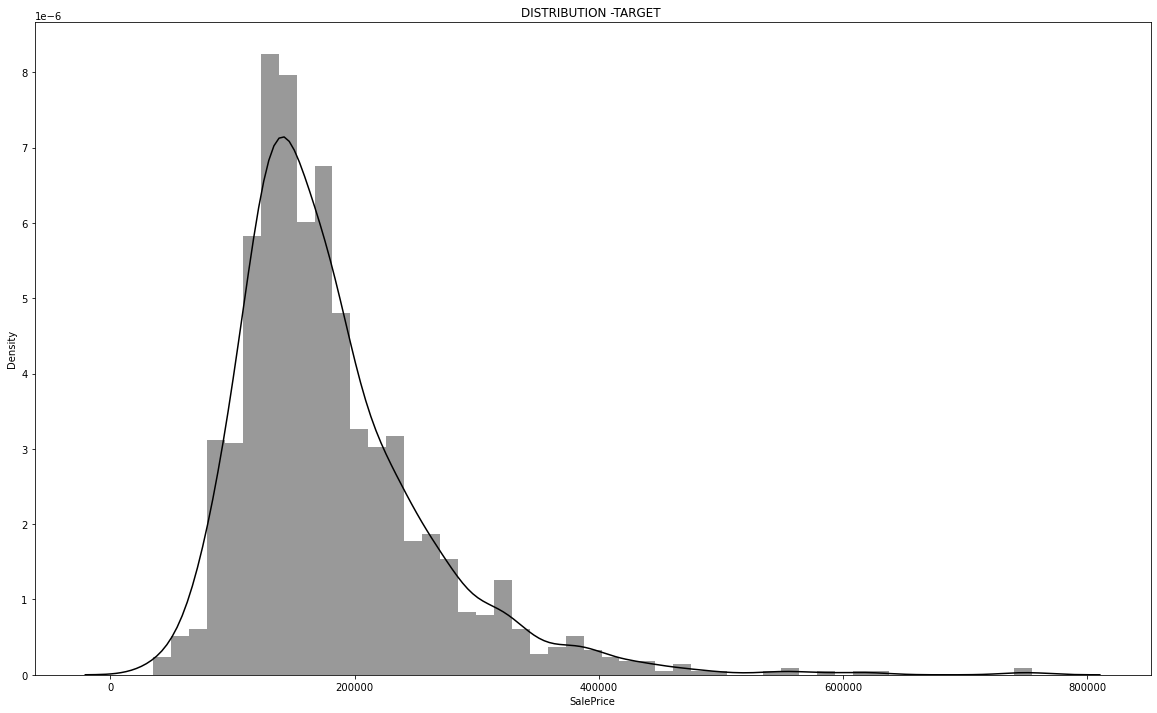

In [949]:
plt.figure(figsize=(20,12))
ax = sns.distplot(data['SalePrice'], color='black')
ax.set_title('DISTRIBUTION -TARGET ')

In [950]:


# sns.distplot(np.log(data["SalePrice"]))

In [951]:
data.SalePrice.describe([0.25,0.50,0.75,0.9,0.99])

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
90%      278000.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

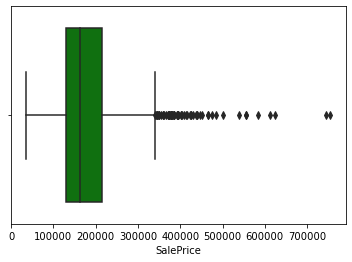

In [952]:
sns.boxplot(x=data['SalePrice'], color='green')

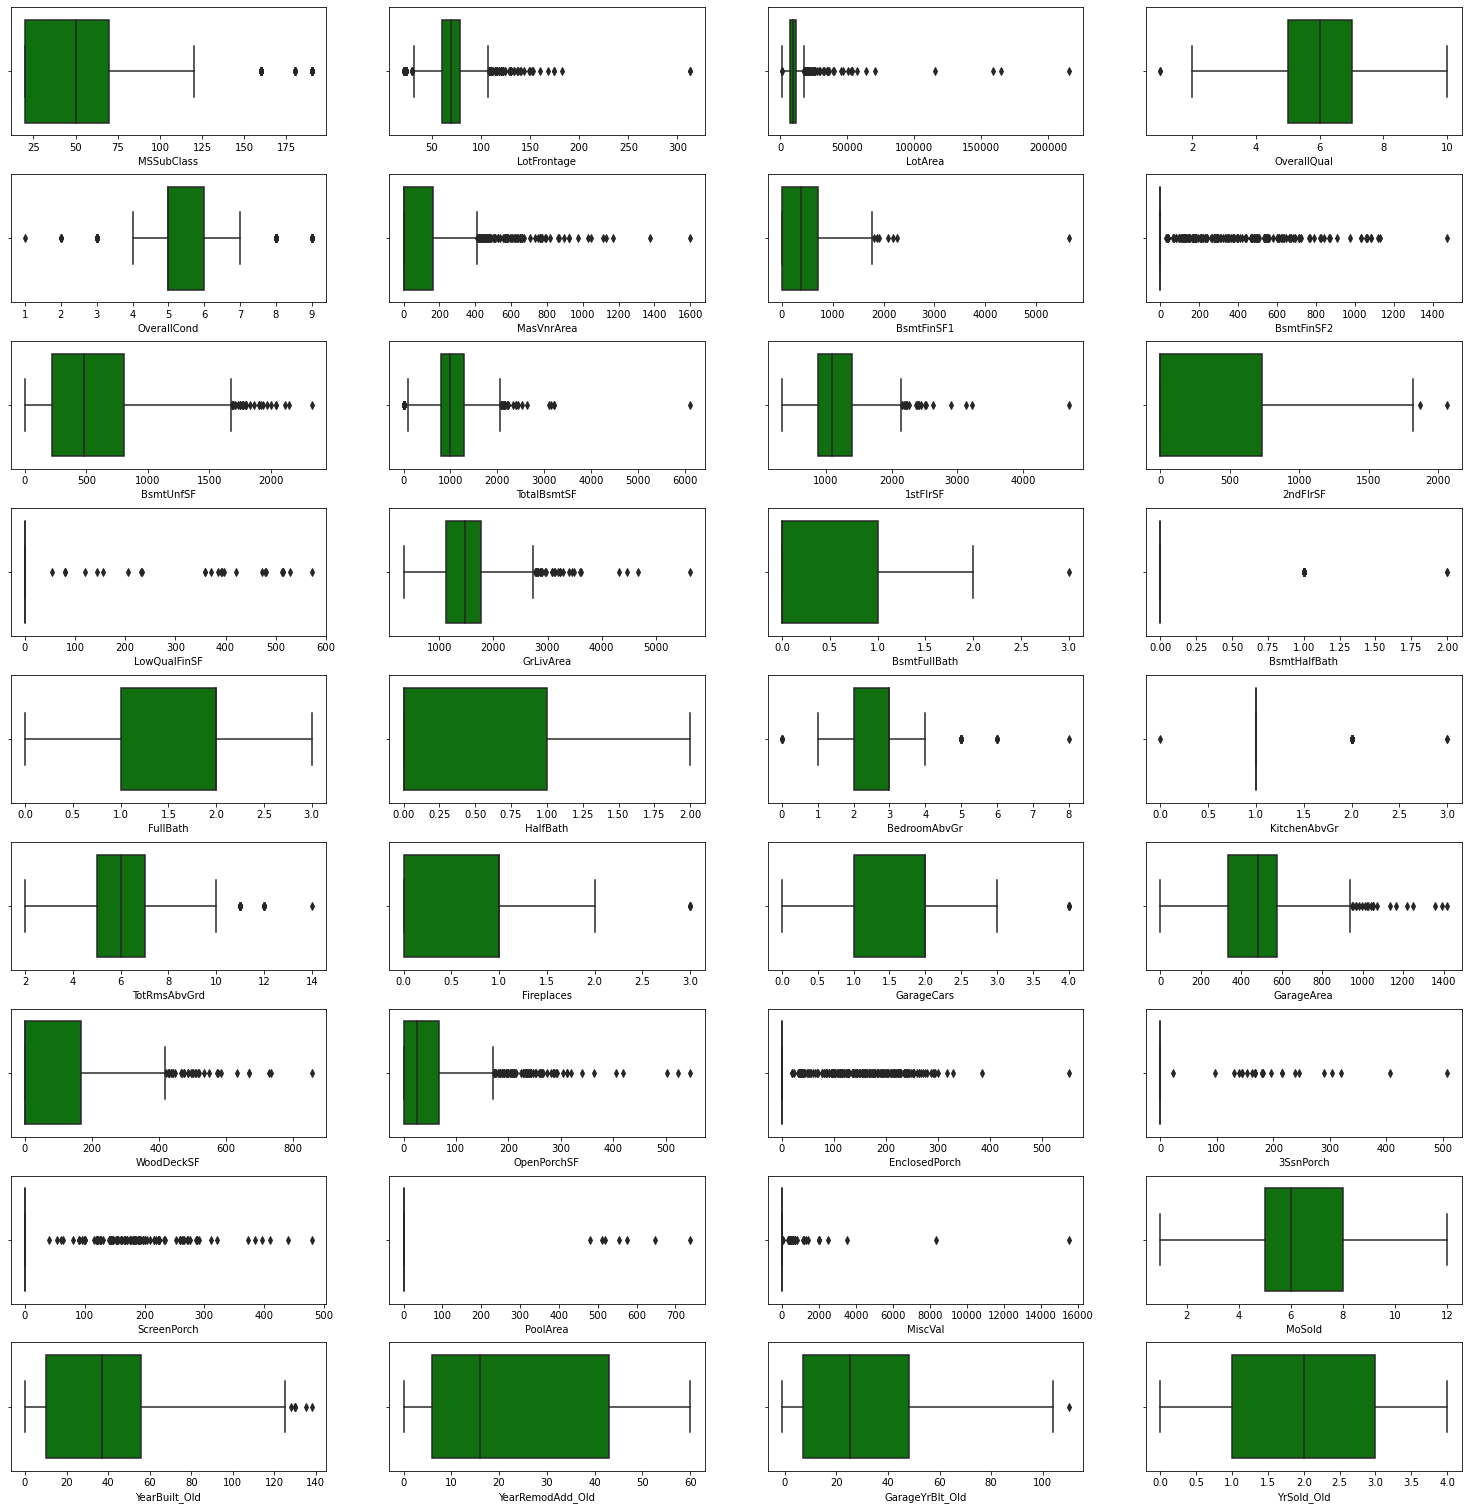

In [953]:
#Creating subplots
import seaborn as sns
fig = plt.figure(figsize=(26,30))
spec = fig.add_gridspec(10,4)
sec=[]
cnt=0
spec.update(wspace=0.2, hspace=0.3)


sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])
sec_25 = fig.add_subplot(spec[6,0])
sec_26 = fig.add_subplot(spec[6,1])
sec_27 = fig.add_subplot(spec[6,2])
sec_28 = fig.add_subplot(spec[6,3])
sec_29 = fig.add_subplot(spec[7,0])
sec_30 = fig.add_subplot(spec[7,1])
sec_31 = fig.add_subplot(spec[7,2])
sec_32 = fig.add_subplot(spec[7,3])
sec_33 = fig.add_subplot(spec[8,0])
sec_34 = fig.add_subplot(spec[8,1])
sec_35 = fig.add_subplot(spec[8,2])
sec_36 = fig.add_subplot(spec[8,3])




sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11,sec_12,sec_13,sec_14,sec_15,sec_16,sec_17,sec_18,sec_19,sec_20,sec_21,sec_22,sec_23,sec_24,sec_25,sec_26,sec_27,sec_28,sec_29,sec_30,sec_31,sec_32,sec_33,sec_34,sec_35,sec_36]
cnt = 0
for feature in numerical_feature:
    if data[feature].dtype=='O' or feature=='SalePrice':
        continue
    else:

        sns.boxplot(x=data[feature], ax=sec[cnt], color='green')
        cnt+=1


In [954]:
outlier_feature_moretha2=numerical_feature
for feature in outlier_feature_moretha2:
    if data[feature].dtype!='O' and len(data[feature].unique())>2:
        lower_quartile = data[feature].quantile(0.25)
        upper_quartile = data[feature].quantile(0.75)
        IQR = upper_quartile - lower_quartile
        lower_fence = lower_quartile - (1.5*IQR)
        upper_fence = upper_quartile + (1.5*IQR)
        
        data[feature] = np.where(data[feature]>upper_fence, 
                                upper_fence,   
                                data[feature])
        
        data[feature] = np.where(data[feature]<lower_fence,
                               lower_fence,
                               data[feature])

In [955]:
s_nunique = 0
n_nunique = 0
for feature in data:
    if data[feature].dtype != 'O':
        if len(data[feature].unique())==1:
            s_nunique += 1
            
        else:
            n_nunique += 1

print(f'There are {s_nunique} numerical features that has one unique value including Nan')
print(f'There are {n_nunique} numerical features that has more than one unique value')

There are 9 numerical features that has one unique value including Nan
There are 28 numerical features that has more than one unique value


In [956]:
data=data[data.columns[data.nunique()!=1]]

In [957]:
number_rows_columns(data)
category_numerical(data)

The dataset has 1460 rows and 67 columns


NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 28 numerical features and 39 categorical features




In [958]:
# number of numerical and categorical features
num, obj = 0, 0
numerical_feature=[]
categorical_feature=[]
for feature in data:
    if data[feature].dtype == 'O':
        categorical_feature.append(feature)
        obj += 1
    else:
        num += 1
        numerical_feature.append(feature)

print(f'{categorical_feature} are categorical features')
print("\n")
print(f'{numerical_feature} are numerical features')

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] are categorical features


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice', 'YearBuilt_Old', 'YearRemodAdd_Old', 'GarageYrBlt_Old', 'YrSold_Old'] are numerical features


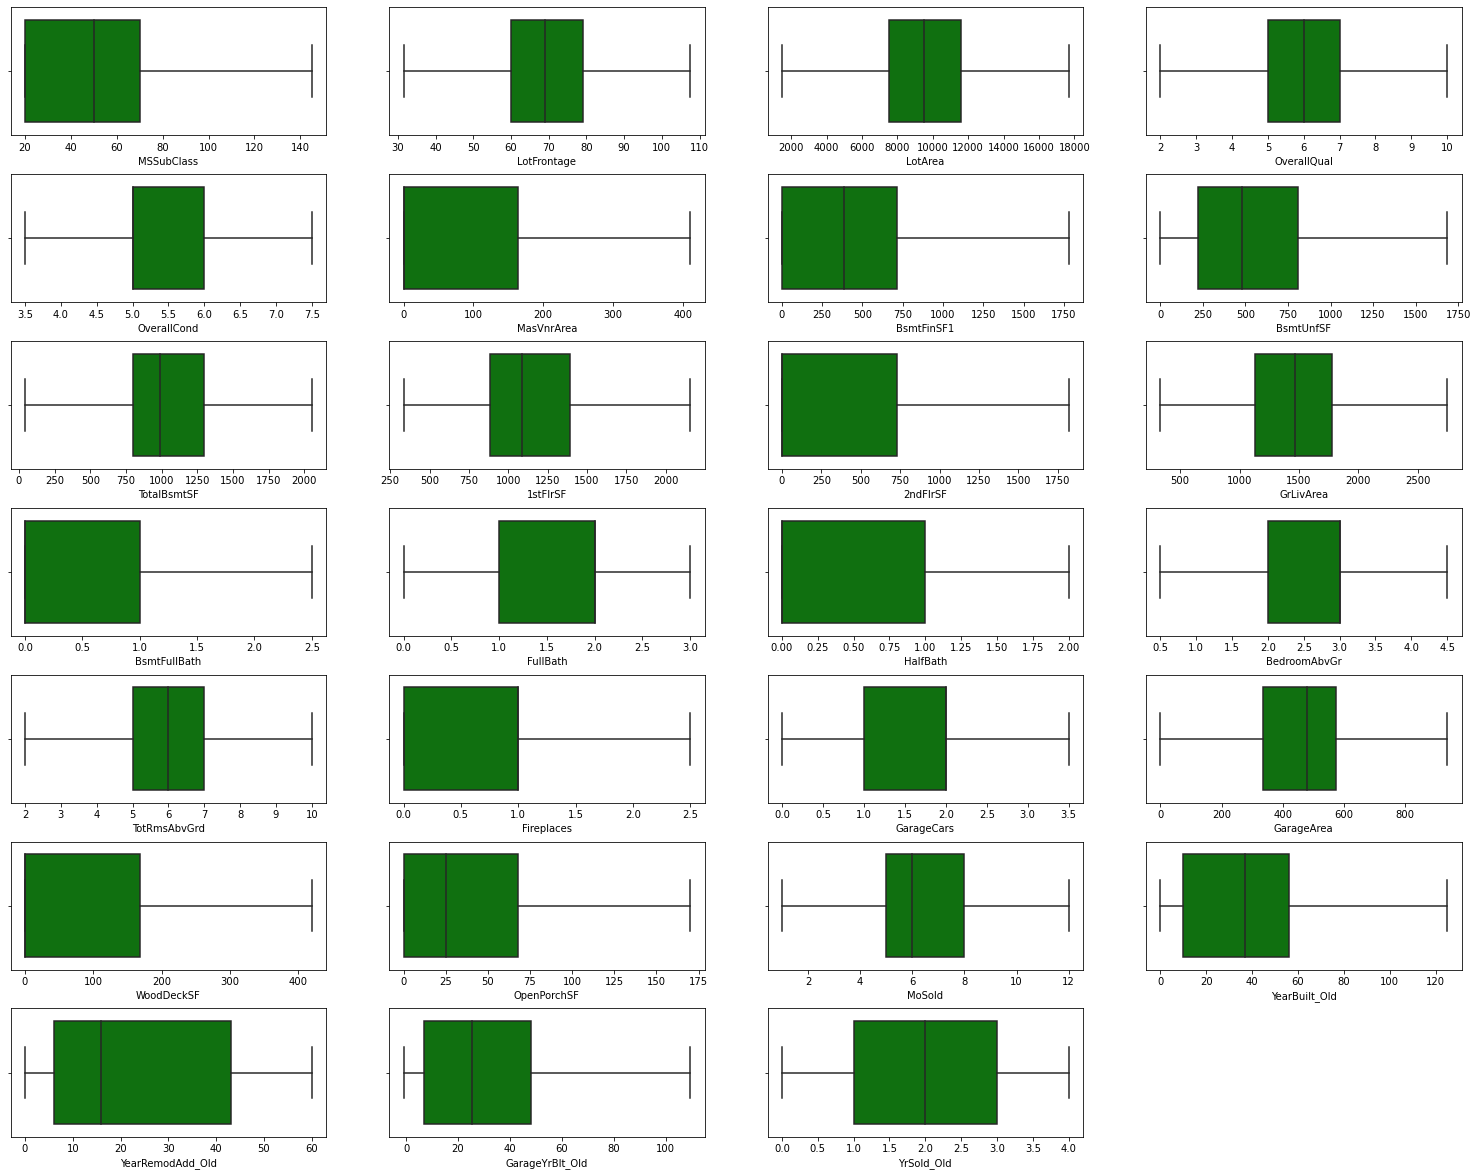

In [959]:
#Creating subplots

fig = plt.figure(figsize=(26,30))
spec = fig.add_gridspec(10,4)
sec=[]
cnt=0
spec.update(wspace=0.2, hspace=0.3)


sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])
sec_25 = fig.add_subplot(spec[6,0])
sec_26 = fig.add_subplot(spec[6,1])
sec_27 = fig.add_subplot(spec[6,2])






sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11,sec_12,sec_13,sec_14,sec_15,sec_16,sec_17,sec_18,sec_19,sec_20,sec_21,sec_22,sec_23,sec_24,sec_25,sec_26,sec_27]
cnt = 0
for feature in numerical_feature:
    if data[feature].dtype=='O' or feature=='SalePrice':
        continue
    else:

        sns.boxplot(x=data[feature], ax=sec[cnt], color='green')
        cnt+=1

In [960]:
# for feature in numerical_feature :
#     if feature != 'SalePrice':
#         data[feature]=np.log(data[numerical_feature])
#         print(data[feature].describe())

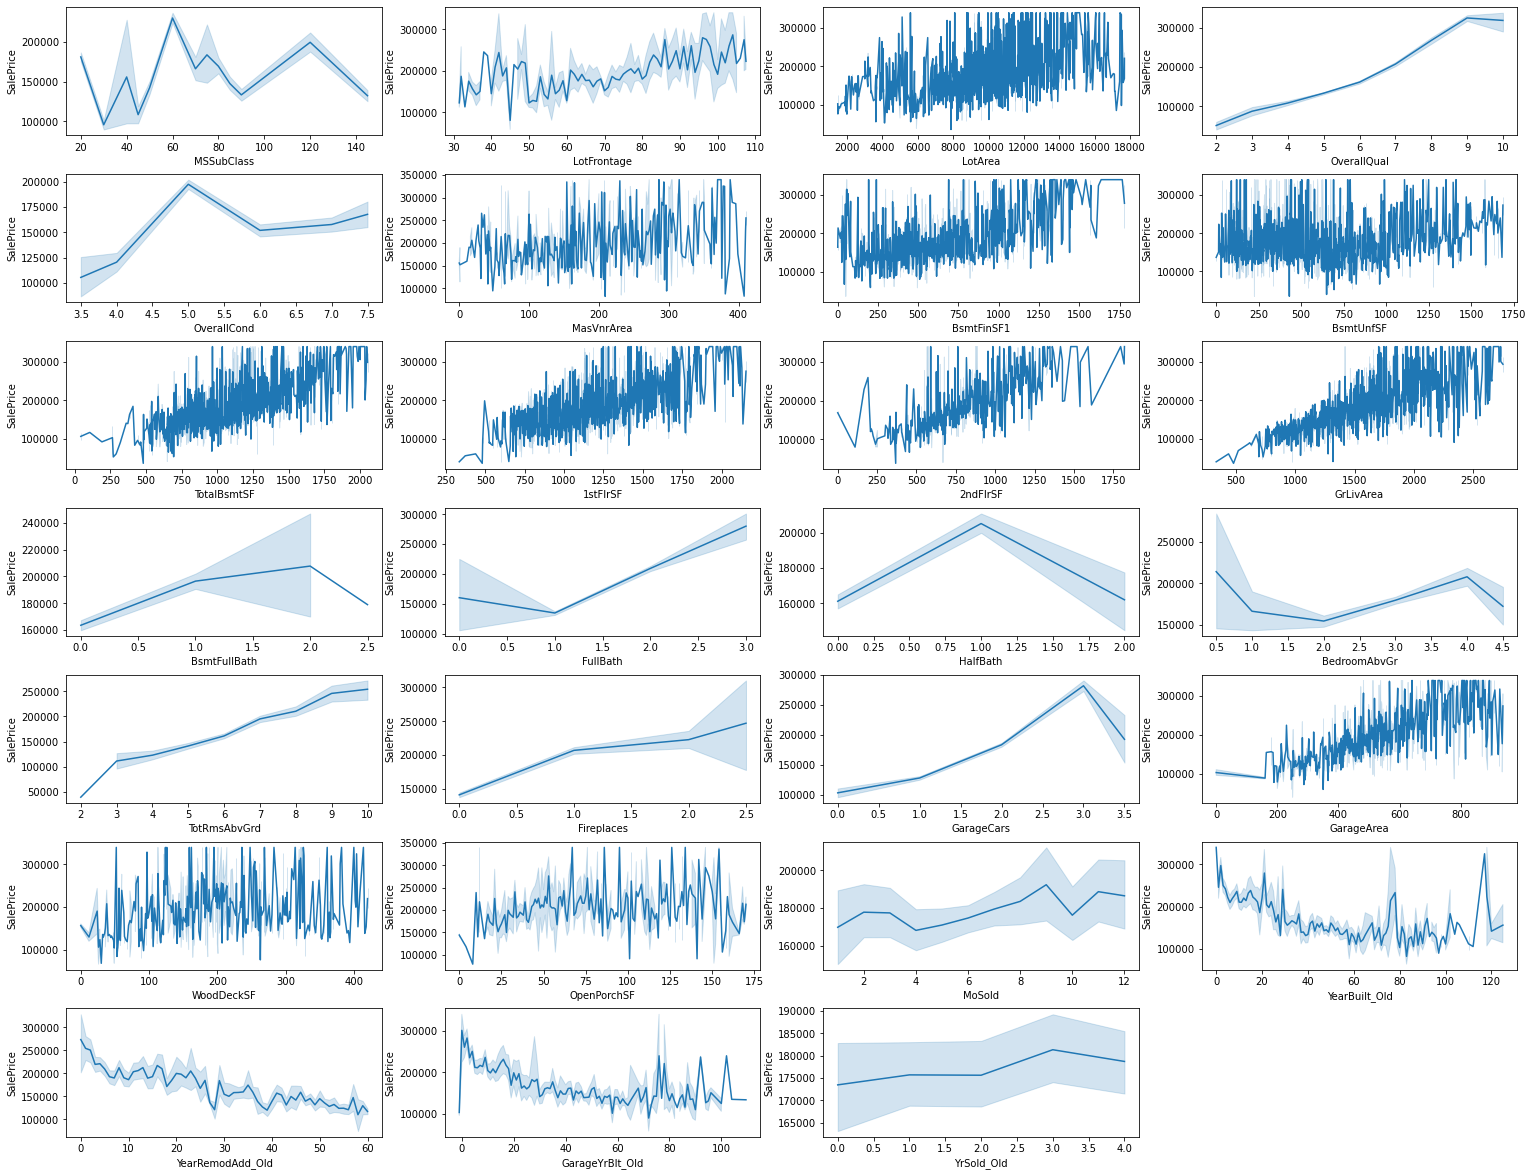

In [961]:
#Creating subplots
import seaborn as sns
fig = plt.figure(figsize=(26,30))
spec = fig.add_gridspec(10,4)


spec.update(wspace=0.2, hspace=0.3)


sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])
sec_25 = fig.add_subplot(spec[6,0])
sec_26 = fig.add_subplot(spec[6,1])
sec_27 = fig.add_subplot(spec[6,2])




sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11,sec_12,sec_13,sec_14,sec_15,sec_16,sec_17,sec_18,sec_19,sec_20,sec_21,sec_22,sec_23,sec_24,sec_25,sec_26,sec_27]
cnt = 0
for feature in numerical_feature:
    if feature!='SalePrice':
        sns.lineplot(data=data,x=data[feature],y='SalePrice', 
                 ax=sec[cnt],
                 palette=['#AECB46', "#FF4C33"])
        cnt=cnt+1

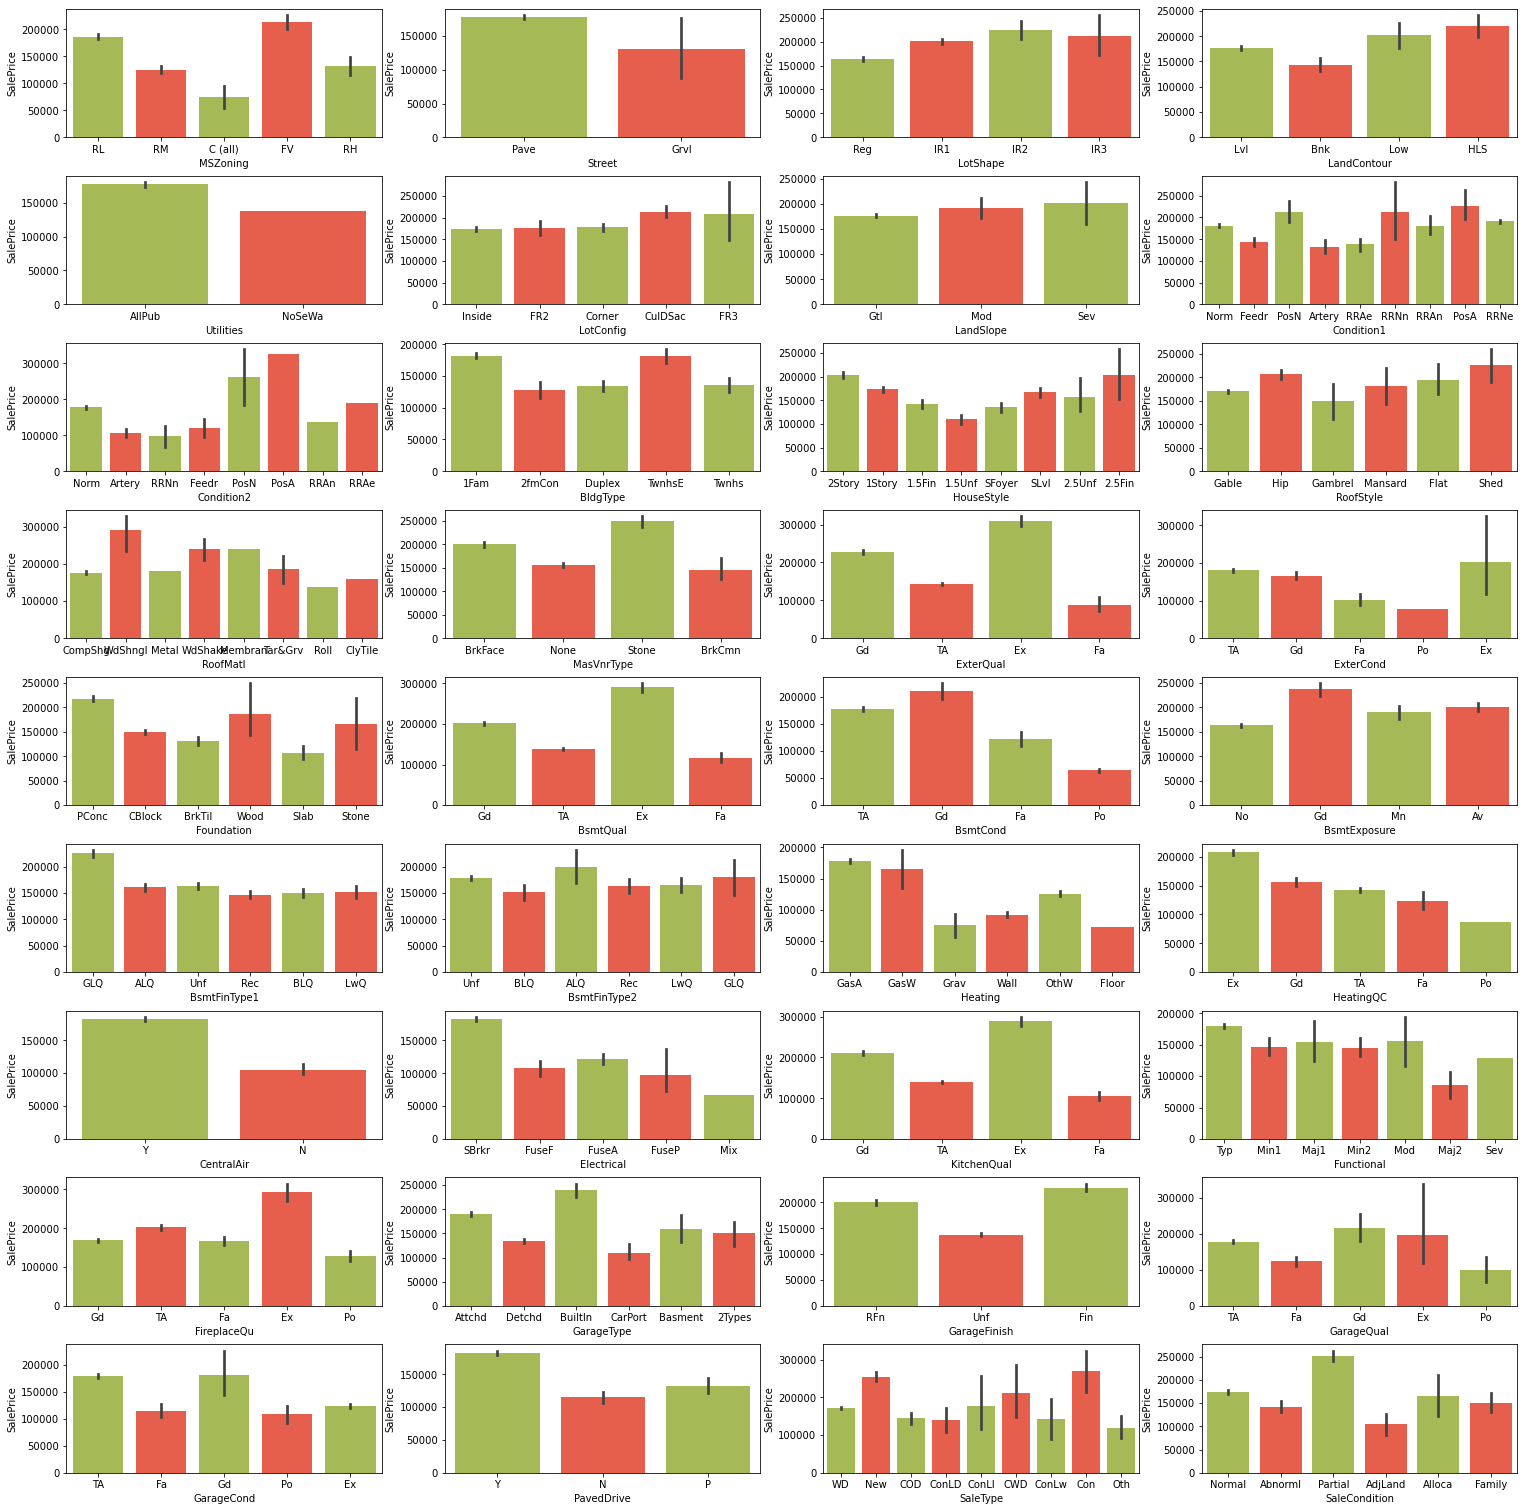

In [962]:
#Creating subplots
import seaborn as sns
fig = plt.figure(figsize=(26,30))
spec = fig.add_gridspec(10,4)
sec=[]
cnt=0
spec.update(wspace=0.2, hspace=0.3)


sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])
sec_25 = fig.add_subplot(spec[6,0])
sec_26 = fig.add_subplot(spec[6,1])
sec_27 = fig.add_subplot(spec[6,2])
sec_28 = fig.add_subplot(spec[6,3])
sec_29 = fig.add_subplot(spec[7,0])
sec_30 = fig.add_subplot(spec[7,1])
sec_31 = fig.add_subplot(spec[7,2])
sec_32 = fig.add_subplot(spec[7,3])
sec_33 = fig.add_subplot(spec[8,0])
sec_34 = fig.add_subplot(spec[8,1])
sec_35 = fig.add_subplot(spec[8,2])
sec_36 = fig.add_subplot(spec[8,3])




too_many_value=['Neighborhood','Exterior1st','Exterior2nd']
sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11,sec_12,sec_13,sec_14,sec_15,sec_16,sec_17,sec_18,sec_19,sec_20,sec_21,sec_22,sec_23,sec_24,sec_25,sec_26,sec_27,sec_28,sec_29,sec_30,sec_31,sec_32,sec_33,sec_34,sec_35,sec_36]
cnt = 0
for feature in categorical_feature:
    if feature not in too_many_value:
        sns.barplot(data =data, 
                x=data[feature],
                 y='SalePrice', 
                 ax=sec[cnt],
                 palette=['#AECB46', "#FF4C33"])
        cnt+=1


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

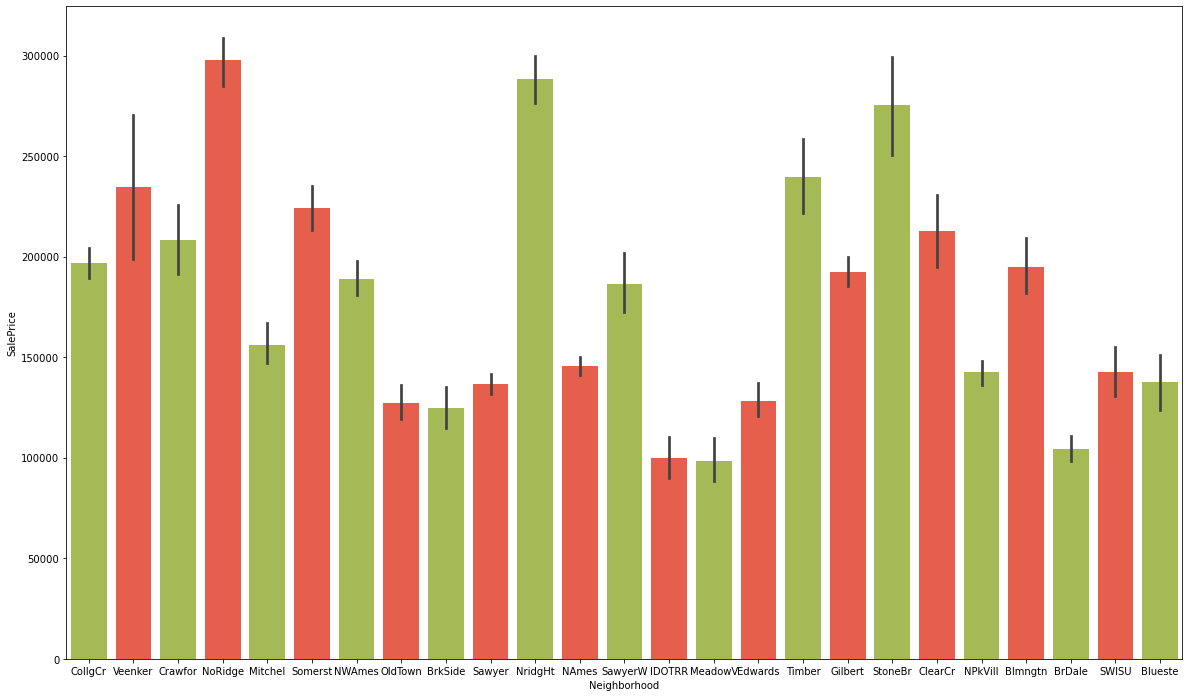

In [963]:
plt.figure(figsize=(20,12))
sns.barplot(data =data, 
                x=data['Neighborhood'],
                 y='SalePrice', 
                 
                 palette=['#AECB46', "#FF4C33"])

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

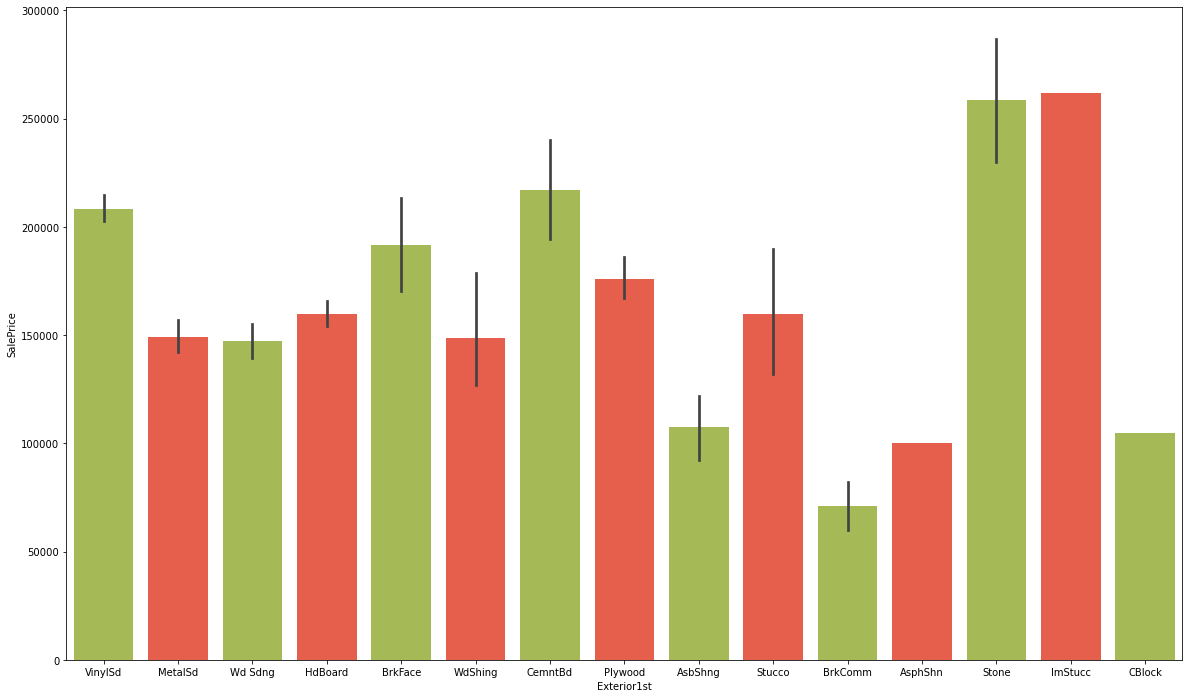

In [964]:
plt.figure(figsize=(20,12))
sns.barplot(data =data, 
                x=data['Exterior1st'],
                 y='SalePrice', 
                 
                 palette=['#AECB46', "#FF4C33"])


<AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>

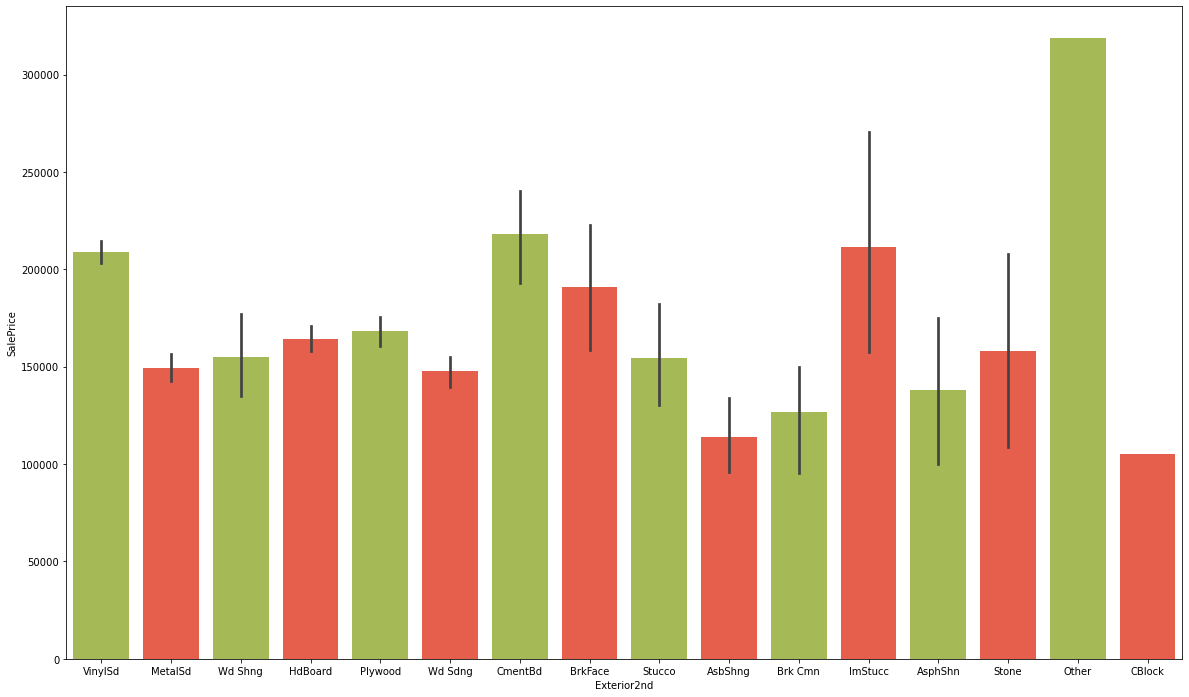

In [965]:
plt.figure(figsize=(20,12))
sns.barplot(data =data, 
                x=data['Exterior2nd'],
                 y='SalePrice', 
                 
                 palette=['#AECB46', "#FF4C33"])

In [966]:
print(data.skew())

MSSubClass          1.019624
LotFrontage         0.094443
LotArea             0.208492
OverallQual         0.249513
OverallCond         0.579334
MasVnrArea          1.287759
BsmtFinSF1          0.739877
BsmtUnfSF           0.796931
TotalBsmtSF         0.237240
1stFlrSF            0.664134
2ndFlrSF            0.800109
GrLivArea           0.593556
BsmtFullBath        0.563057
FullBath            0.036562
HalfBath            0.675897
BedroomAbvGr       -0.253298
TotRmsAbvGrd        0.366919
Fireplaces          0.584655
GarageCars         -0.391629
GarageArea         -0.069685
WoodDeckSF          1.083673
OpenPorchSF         1.136301
MoSold              0.212053
SalePrice           0.802786
YearBuilt_Old       0.594020
YearRemodAdd_Old    0.503562
GarageYrBlt_Old     0.677561
YrSold_Old         -0.096269
dtype: float64


In [967]:
data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
MSSubClass,1.000000,-0.399010,-0.403395,0.062802,-0.085384,0.034657,-0.076423,-0.132790,-0.251190,-0.259517,0.330582,0.098235,-0.003201,0.150567,0.204110,-0.050319,0.044963,-0.029426,-0.017853,-0.085825,-0.009879,0.001883,-0.003956,-0.061456,-0.055790,-0.058578,-0.113333,0.021216
LotFrontage,-0.399010,1.000000,0.579385,0.244267,-0.063581,0.210284,0.144167,0.149535,0.336444,0.392061,0.069358,0.341141,0.062187,0.192438,0.062837,0.283765,0.337543,0.225130,0.310620,0.345119,0.102325,0.147060,0.017264,0.375850,-0.140115,-0.077565,-0.041179,-0.006479
LotArea,-0.403395,0.579385,1.000000,0.221597,-0.026494,0.144086,0.215825,0.087068,0.361769,0.458118,0.121725,0.433877,0.119690,0.213848,0.099300,0.304671,0.395016,0.352550,0.309773,0.344650,0.198311,0.162026,0.003855,0.435876,-0.065765,-0.054472,0.028906,0.036831
OverallQual,0.062802,0.244267,0.221597,1.000000,-0.134096,0.414226,0.229728,0.301697,0.541432,0.473937,0.294860,0.597217,0.112470,0.550501,0.274596,0.116727,0.435768,0.397375,0.605169,0.568181,0.246423,0.358426,0.069460,0.817680,-0.575160,-0.550829,-0.419796,0.027299
OverallCond,-0.085384,-0.063581,-0.026494,-0.134096,1.000000,-0.150941,-0.045411,-0.148518,-0.191827,-0.156582,0.007366,-0.114282,-0.051877,-0.225769,-0.070449,0.005306,-0.081397,-0.037364,-0.216744,-0.177911,-0.011283,-0.082415,-0.009981,-0.105920,0.399685,-0.038429,0.317192,-0.046162
MasVnrArea,0.034657,0.210284,0.144086,0.414226,-0.150941,1.000000,0.247185,0.108669,0.355451,0.336554,0.143482,0.361094,0.097857,0.273167,0.198840,0.126770,0.281209,0.249994,0.385127,0.384180,0.161904,0.172885,0.008498,0.450751,-0.346081,-0.185138,-0.212317,-0.002687
BsmtFinSF1,-0.076423,0.144167,0.215825,0.229728,-0.045411,0.247185,1.000000,-0.524935,0.467355,0.395393,-0.157613,0.138405,0.663118,0.052879,-0.005136,-0.111229,0.017366,0.246089,0.230993,0.278350,0.209159,0.088830,-0.004769,0.387586,-0.252815,-0.126339,-0.108738,-0.013968
BsmtUnfSF,-0.132790,0.149535,0.087068,0.301697,-0.148518,0.108669,-0.524935,1.000000,0.427672,0.317715,0.008717,0.245858,-0.427543,0.286866,-0.042212,0.163103,0.253440,0.049679,0.210297,0.178489,-0.009997,0.150560,0.036607,0.216006,-0.145236,-0.178277,-0.164089,0.042775
TotalBsmtSF,-0.251190,0.336444,0.361769,0.541432,-0.191827,0.355451,0.467355,0.427672,1.000000,0.807158,-0.206180,0.404365,0.304229,0.331598,-0.065909,0.048901,0.271000,0.329970,0.460029,0.485659,0.241778,0.249657,0.028473,0.645251,-0.410450,-0.301581,-0.257902,0.018521
1stFlrSF,-0.259517,0.392061,0.458118,0.473937,-0.156582,0.336554,0.395393,0.317715,0.807158,1.000000,-0.227037,0.526720,0.237178,0.383460,-0.135316,0.128034,0.401272,0.406308,0.458349,0.487426,0.238082,0.204386,0.045429,0.621873,-0.288418,-0.246660,-0.172003,0.013545


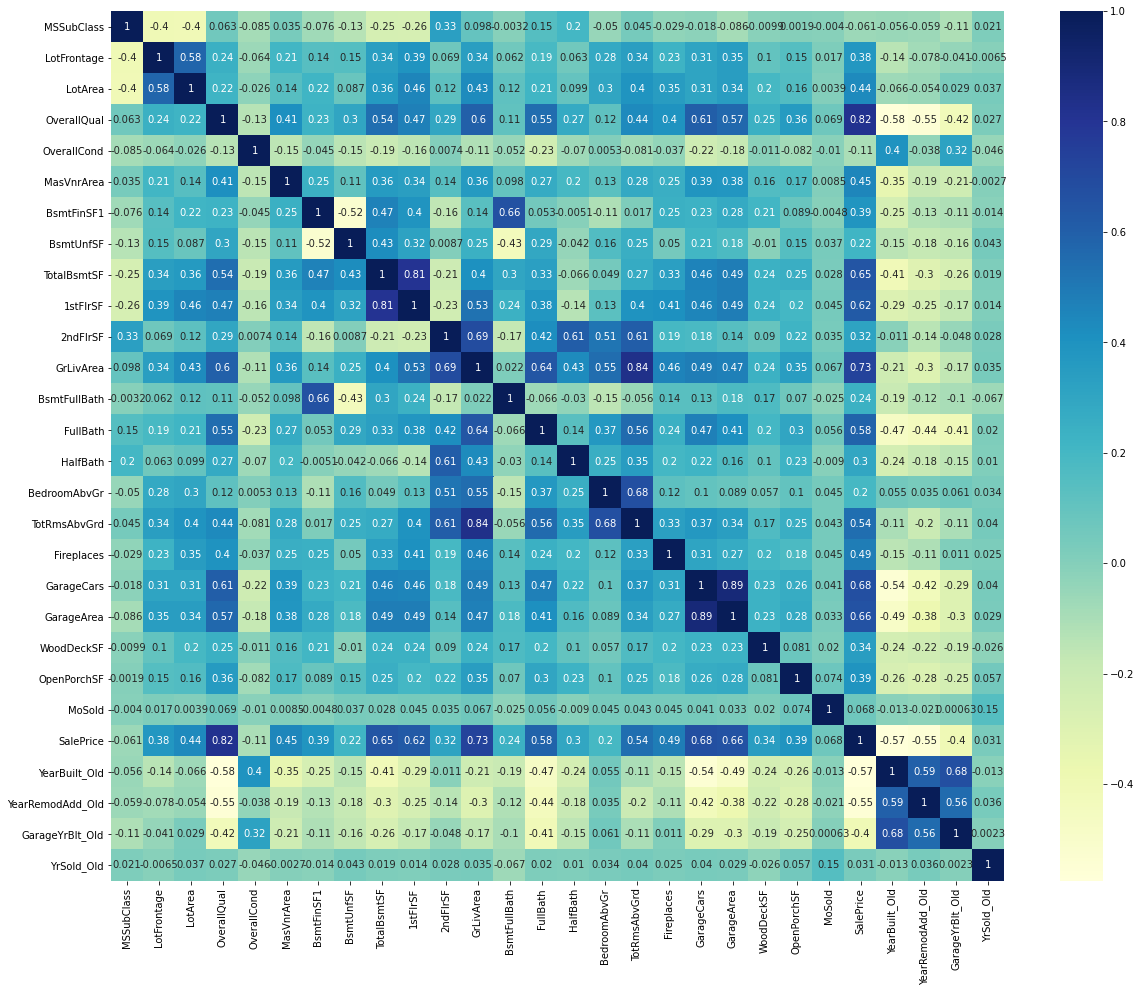

In [968]:
plt.figure(figsize = (20, 16))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### DUMMY FEATURE 

In [969]:
# Convert categorical value into Dummy variable
data=pd.get_dummies(data,drop_first=True)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,196.0,706.0,150.0,856.0,856.0,854.0,1710.0,1.0,2.0,1.0,3.0,8.0,0.0,2.0,548.0,0.0,61.0,2.0,208500.0,7.0,7.0,7.0,2.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20.0,80.0,9600.0,6.0,7.5,0.0,978.0,284.0,1262.0,1262.0,0.0,1262.0,0.0,2.0,0.0,3.0,6.0,1.0,2.0,460.0,298.0,0.0,5.0,181500.0,34.0,34.0,34.0,3.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60.0,68.0,11250.0,7.0,5.0,162.0,486.0,434.0,920.0,920.0,866.0,1786.0,1.0,2.0,1.0,3.0,6.0,1.0,2.0,608.0,0.0,42.0,9.0,223500.0,9.0,8.0,9.0,2.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70.0,60.0,9550.0,7.0,5.0,0.0,216.0,540.0,756.0,961.0,756.0,1717.0,1.0,1.0,0.0,3.0,7.0,1.0,3.0,642.0,0.0,35.0,2.0,140000.0,95.0,40.0,12.0,4.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60.0,84.0,14260.0,8.0,5.0,350.0,655.0,490.0,1145.0,1145.0,1053.0,2198.0,1.0,2.0,1.0,4.0,9.0,1.0,3.0,836.0,192.0,84.0,12.0,250000.0,10.0,10.0,10.0,2.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [970]:
# data_dummy= pd.get_dummies(data[categorical_feature],drop_first=True) 
# data=pd.concat([data[numerical_feature],data_dummy],axis=1)
# data.shape

In [990]:
data_train, data_test = train_test_split(data, train_size = 0.70, test_size = 0.30, random_state = 42)

In [991]:
##test and train shape check 
rows, columns = data_train.shape
print(f'The encoded feature dataset has {rows} rows and {columns} columns')
rows, columns = data_test.shape
print(f'The encoded feature dataset has {rows} rows and {columns} columns')

The encoded feature dataset has 1021 rows and 228 columns
The encoded feature dataset has 438 rows and 228 columns


In [992]:
numerical_feature
data_test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=228)

In [993]:

scaler = StandardScaler()
data_train[numerical_feature] = scaler.fit_transform(data_train[numerical_feature])
data_train.head()
data_test[numerical_feature] = scaler.fit_transform(data_test[numerical_feature])
data_test.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,-0.939015,0.064337,-0.306153,-0.022711,1.968450,-0.623124,0.511212,-0.376171,0.027630,-0.202389,-0.779535,-0.839780,-0.833311,-0.931395,-0.770007,0.268350,-0.277716,-0.979225,-0.938334,-0.911810,0.994294,-0.766730,-1.496725,-0.308918,0.310660,-0.876356,0.687649,1.364652,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1105,0.135898,1.711573,0.779401,1.398371,-0.573358,2.172822,1.344284,-0.292686,1.042405,0.979423,1.861821,2.358664,1.097854,0.842305,1.146260,0.268350,1.673720,2.233513,0.358165,1.177780,0.938043,-0.112732,-0.788005,2.185183,-0.766772,-0.484278,-0.556607,-1.635185,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
413,-0.670287,-0.759282,-0.151881,-0.733252,0.443366,-0.623124,-0.985609,1.083616,-0.100473,-0.311816,-0.779535,-0.922108,-0.833311,-0.931395,-0.770007,-1.044916,-0.928194,0.627144,0.358165,-0.464041,-0.805722,-0.766730,-1.142365,-0.886730,1.561872,1.721158,2.132592,-1.635185,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
522,-0.132830,-1.112261,-1.270776,-0.022711,1.460089,-0.623124,-0.084807,0.122351,-0.110520,-0.377472,0.774204,0.386908,-0.833311,0.842305,-0.770007,0.268350,0.372763,2.233513,0.358165,-0.184185,-0.805722,-0.276232,1.338153,-0.243091,0.866755,1.721158,1.209434,1.364652,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1036,-0.939015,1.182105,0.960797,2.108912,-0.573358,-0.082471,1.321708,0.105654,1.436760,1.307704,-0.779535,0.296347,1.097854,0.842305,-0.770007,-1.044916,-0.277716,0.627144,1.654665,2.110632,1.331796,-0.766730,0.983793,2.046216,-1.218598,-1.121404,-1.118529,-0.885226,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [994]:
y_train = data_train.pop('SalePrice')
X_train = data_train
y_test = data_test.pop('SalePrice')
X_test = data_test

In [995]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [996]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 35)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [997]:
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

In [998]:
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)


0.8653668432549146
0.8211324723250658


In [999]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.model_selection import GridSearchCV

In [1072]:
def ModelLassoandRidge(folds,estimator_param,X_train,y_train,X_test,y_test):
# list of alphas to tune
    params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,10.5,11.5,12.5,15.0, 20, 50, 100, 500, 1000 ]}  
    if estimator_param:
       
        estimator = Ridge()
    else:
        
        estimator = Lasso()
    folds=KFold(n_splits=folds,shuffle=True,random_state=42)
    model_cv = GridSearchCV(estimator = estimator, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
    model_cv.fit(X_train, y_train) 
    print(model_cv.best_params_)
    print(model_cv.best_score_)
    cv_results = pd.DataFrame(model_cv.cv_results_)
    cv_results = cv_results[cv_results['param_alpha']<=1000]
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
    plt.figure(figsize=(16,5))

# plotting
    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('Negative Mean Absolute Error')
    plt.title("Negative Mean Absolute Error and alpha")
    plt.legend(['train score', 'test score'], loc='upper right')
    plt.show()
    if estimator_param:
        model = Ridge(alpha=model_cv.best_params_["alpha"])
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        r2_train_lr = r2_score(y_train, y_pred_train)
        print(r2_train_lr)
        r2_test_lr = r2_score(y_test, y_pred_test)
        print(r2_test_lr)
        print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_pred_test))
    else:
        model = Lasso(alpha=model_cv.best_params_["alpha"])
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        r2_train_lr = r2_score(y_train, y_pred_train)
        print(r2_train_lr)
        r2_test_lr = r2_score(y_test, y_pred_test)
        print(r2_test_lr)
        print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_pred_test))
    return model
        


    
    
    

Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'alpha': 12.5}
-0.2184909566768715


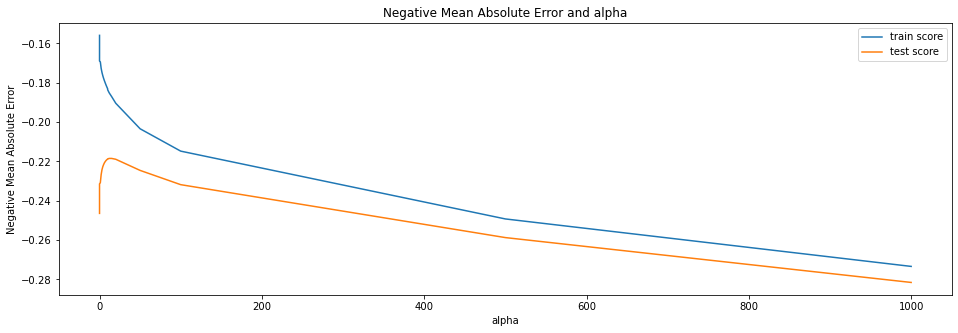

0.9248176792073433
0.9201638691702637
The MSE of the model on the test dataset for optimum alpha is 0.07983613082973626


Ridge(alpha=12.5)

In [1073]:
ModelLassoandRidge(5,True,X_train,y_train,X_test,y_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'alpha': 0.001}
-0.2212662109830522


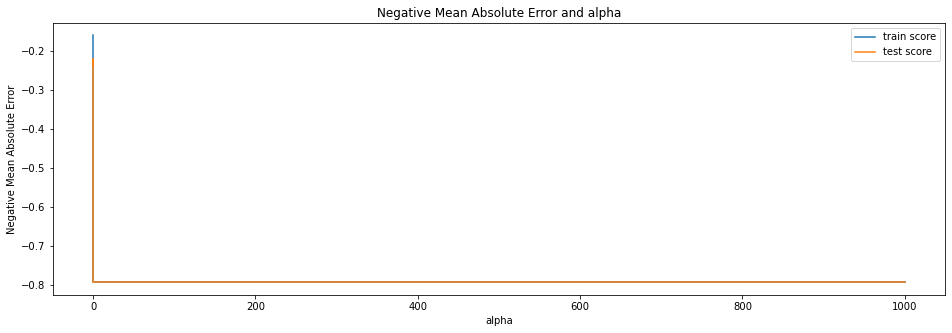

0.9256720424310372
0.9160595748144633
The MSE of the model on the test dataset for optimum alpha is 0.08394042518553675


Lasso(alpha=0.001)

In [1074]:
ModelLassoandRidge(5,False,X_train,y_train,X_test,y_test)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
{'alpha': 15.0}
-0.21654400784492328


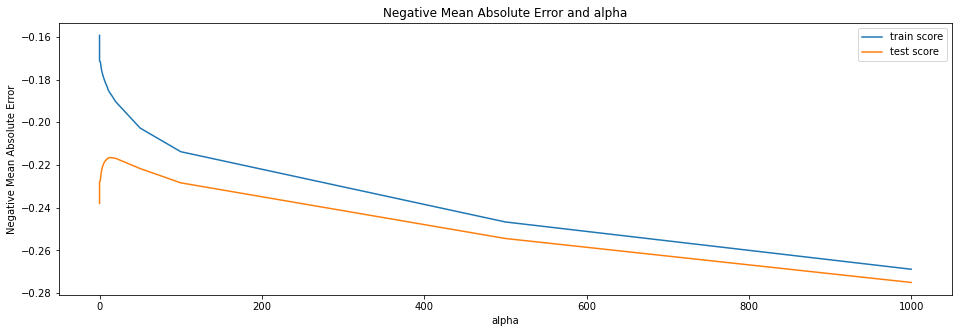

0.9232376112207881
0.9207324285350716
The MSE of the model on the test dataset for optimum alpha is 0.07926757146492834


Ridge(alpha=15.0)

In [1075]:
ModelLassoandRidge(10,True,X_train,y_train,X_test,y_test)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
{'alpha': 0.001}
-0.21780965174325906


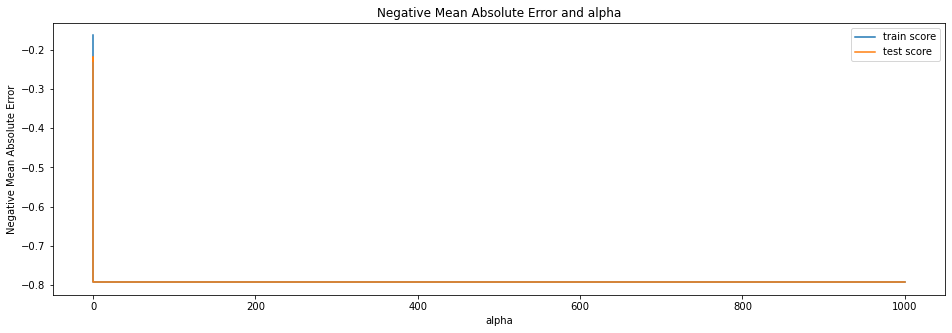

0.9256720424310372
0.9160595748144633
The MSE of the model on the test dataset for optimum alpha is 0.08394042518553675


Lasso(alpha=0.001)

In [1076]:
ModelLassoandRidge(10,False,X_train,y_train,X_test,y_test)

Fitting 15 folds for each of 32 candidates, totalling 480 fits
{'alpha': 15.0}
-0.21485694620624682


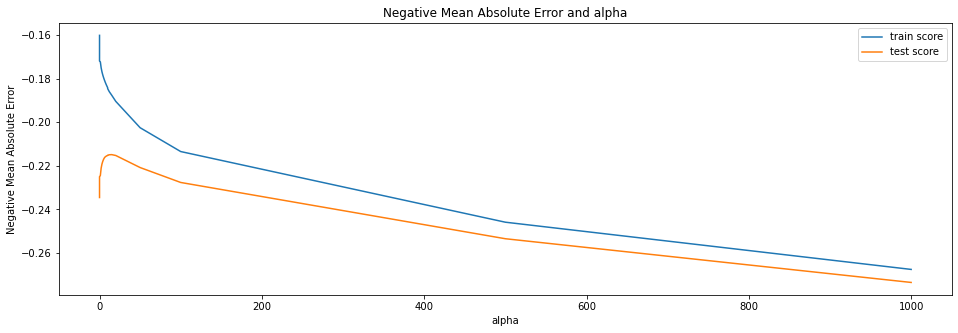

0.9232376112207881
0.9207324285350716
The MSE of the model on the test dataset for optimum alpha is 0.07926757146492834


In [1077]:
final_ridge=ModelLassoandRidge(15,True,X_train,y_train,X_test,y_test)

Fitting 15 folds for each of 32 candidates, totalling 480 fits
{'alpha': 0.001}
-0.21660808059403924


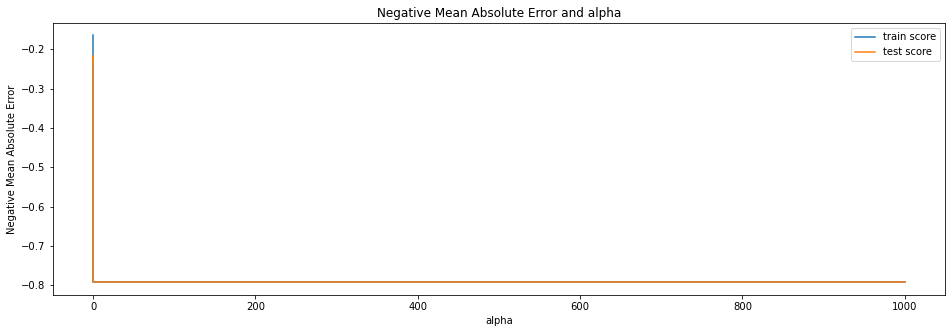

0.9256720424310372
0.9160595748144633
The MSE of the model on the test dataset for optimum alpha is 0.08394042518553675


In [1078]:
final_lasso=ModelLassoandRidge(15,False,X_train,y_train,X_test,y_test)

##### WE CAN SEE LASSO R2 IS HIGHER THAN RIDGE BUT R2 SCORE OF TRAIN AND TEST DIFFERENCE FOR RIDGE IS BETTER THAN LASSO FOR KFOLD =10 AND 15 .
###### FINAL MODEL 
###### RIDGE :ALPHA =15 LASSSO: ALPHA=0.001

In [1079]:
betas = pd.DataFrame(index=X_train.columns)

In [1080]:
betas['Ridge'] = final_ridge.coef_
betas['Lasso'] = final_lasso.coef_

In [1088]:
betas.sort_values(by=['Ridge', 'Lasso'],ascending=False)

,Ridge,Lasso
GrLivArea,0.305176,0.368169
Exterior1st_BrkFace,0.190190,0.312658
Neighborhood_StoneBr,0.184912,0.349424
Functional_Typ,0.181867,0.232752
Neighborhood_NridgHt,0.173153,0.270945
OverallQual,0.170923,0.160155
LandContour_HLS,0.164884,0.218301
Condition2_Norm,0.150586,0.175560
Neighborhood_Crawfor,0.149885,0.215879
Condition1_Norm,0.141188,0.139842
